In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data 
train_peptides = pd.read_csv("train_peptides.csv")
train_proteins = pd.read_csv("train_proteins.csv")
train_clinincal_data = pd.read_csv("train_clinical_data.csv")
supplemental_clinical_data = pd.read_csv("supplemental_clinical_data.csv")

test_peptides = pd.read_csv("./example_test_files/test_peptides.csv")
test_proteins = pd.read_csv("./example_test_files/test_proteins.csv")
test = pd.read_csv("./example_test_files/test.csv")
submission_df = pd.read_csv("./example_test_files/sample_submission.csv")

In [3]:
# Merge the proteins data and peptides data on the common columns.
merged_proteins_peptides = pd.merge(train_proteins, train_peptides, on=['visit_id', 'visit_month',
                                                                         'patient_id', 'UniProt'])

# Merge the merged protein-peptides data with the clinical data on the common columns.
merged = pd.merge(merged_proteins_peptides, train_clinincal_data, on=['visit_id', 'visit_month', 'patient_id'])

# Show the merged data.
merged

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.30,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.00,10.0,6.0,15.0,NaN,NaN
2,55_0,0,55,O00533,732430.0,IEIPSSVQQVPTIIK,174185.00,10.0,6.0,15.0,NaN,NaN
3,55_0,0,55,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90,10.0,6.0,15.0,NaN,NaN
4,55_0,0,55,O00533,732430.0,SMEQNGPGLEYR,30838.70,10.0,6.0,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
941739,58648_108,108,58648,Q9UHG2,369437.0,ILAGSADSEGVAAPR,202820.00,6.0,0.0,0.0,NaN,NaN
941740,58648_108,108,58648,Q9UKV8,105830.0,SGNIPAGTTVDTK,105830.00,6.0,0.0,0.0,NaN,NaN
941741,58648_108,108,58648,Q9Y646,21257.6,LALLVDTVGPR,21257.60,6.0,0.0,0.0,NaN,NaN
941742,58648_108,108,58648,Q9Y6R7,17953.1,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26,6.0,0.0,0.0,NaN,NaN


In [6]:
merged.isna().sum()

visit_id                                    0
visit_month                                 0
patient_id                                  0
UniProt                                     0
NPX                                         0
Peptide                                     0
PeptideAbundance                            0
updrs_1                                     0
updrs_2                                     0
updrs_3                                  9120
updrs_4                                446214
upd23b_clinical_state_on_medication    550019
dtype: int64

In [20]:
def visualize_peptides(slice=10):
    """
    grouping by peptides and peptide abundance
    then visualizing the top slice toptides of each aggregation function
    """

    peptide_abundance = merged.groupby('Peptide').agg({"PeptideAbundance": ["min", "max", 
                                                                        "count", "mean", "median"]})

    # Define the list of aggregate functions
    peptide_abundance.columns = ['min', 'max', 'count', 'mean', 'median']

    for col in peptide_abundance.columns:
        if col == "min":
            sorted_peptide_abundance = peptide_abundance.sort_values(by="min", ascending=True)
        else:
            sorted_peptide_abundance = peptide_abundance.sort_values(by=col, ascending=False)
            
        sns.barplot(x=sorted_peptide_abundance.index[:slice], y=sorted_peptide_abundance[col].values[:slice])
        plt.xticks(rotation=45)
        plt.ylabel("Peptide Abundance")
        plt.xlabel("Peptide")
        plt.title("Peptide Abundance by {}".format(col))
        plt.show()

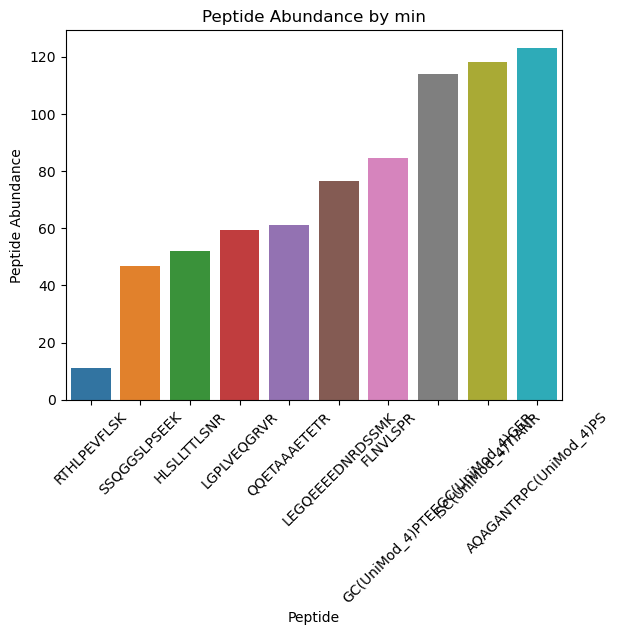

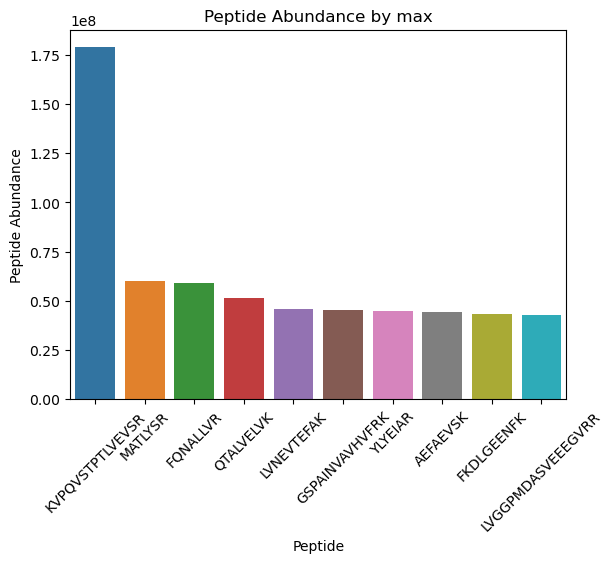

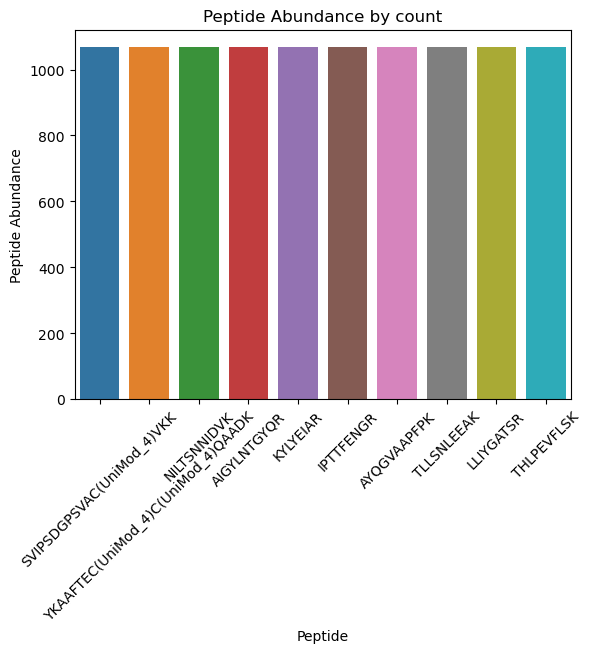

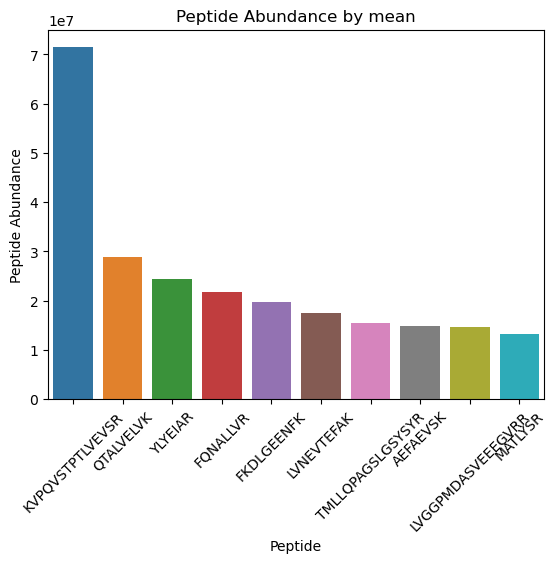

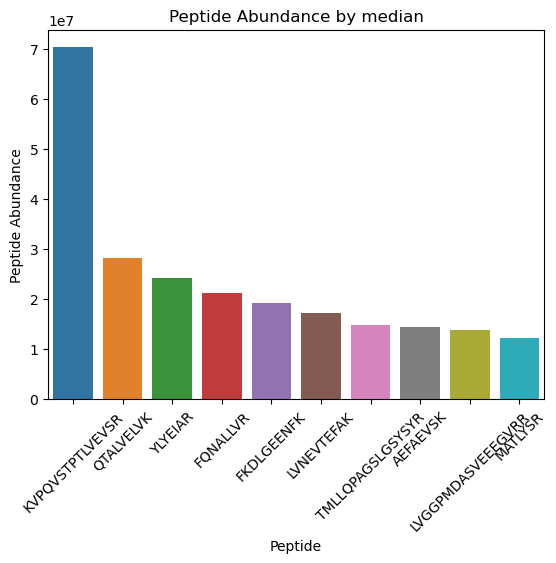

In [21]:
visualize_peptides()

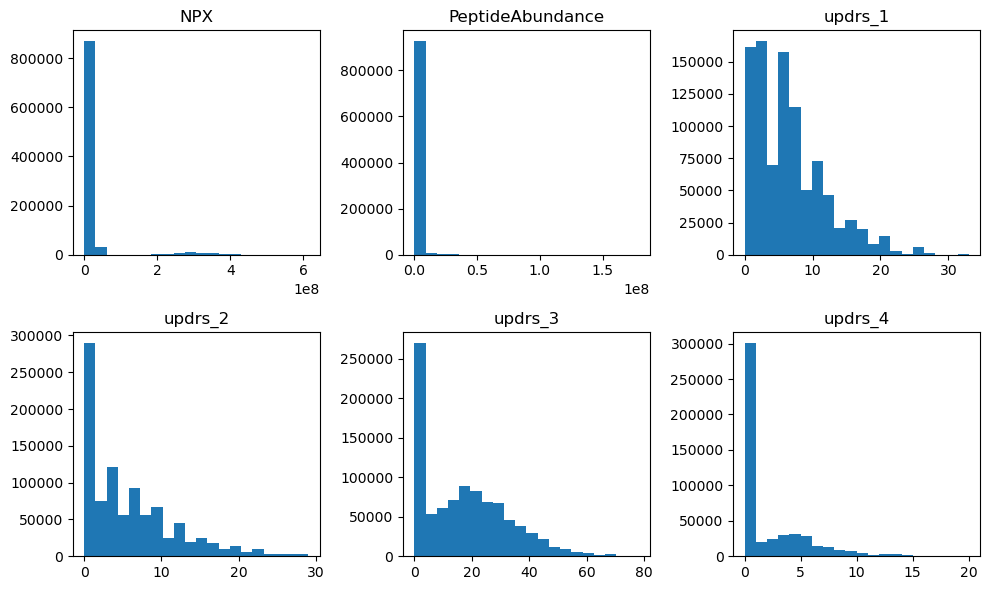

In [ ]:
# Create a figure and axes for each variable
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 6))
axs = axs.flatten()

# Plot histograms for each variable
for i, col in enumerate(['NPX', 'PeptideAbundance', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']):
    axs[i].hist(merged[col].dropna(), bins=20)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

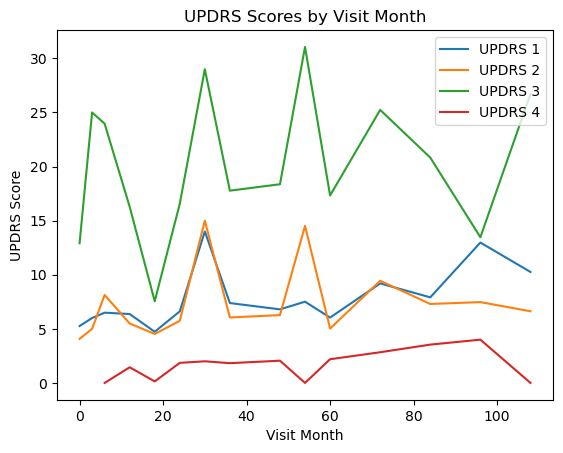

In [ ]:
# Create a figure with one subplot.
fig, ax = plt.subplots()

# Calculate their mean values, then store the result in new dataframes.
merged_updrs_1 = merged.groupby('visit_month')['updrs_1'].mean().reset_index()
merged_updrs_2 = merged.groupby('visit_month')['updrs_2'].mean().reset_index()
merged_updrs_3 = merged.groupby('visit_month')['updrs_3'].mean().reset_index()
merged_updrs_4 = merged.groupby('visit_month')['updrs_4'].mean().reset_index()

# Plot the data as a line plot.
ax.plot(merged_updrs_1['visit_month'], merged_updrs_1['updrs_1'], label='UPDRS 1')
ax.plot(merged_updrs_2['visit_month'], merged_updrs_2['updrs_2'], label='UPDRS 2')
ax.plot(merged_updrs_3['visit_month'], merged_updrs_3['updrs_3'], label='UPDRS 3')
ax.plot(merged_updrs_4['visit_month'], merged_updrs_4['updrs_4'], label='UPDRS 4')

# Add a title and axis labels.
ax.set_title('UPDRS Scores by Visit Month')
ax.set_xlabel('Visit Month')
ax.set_ylabel('UPDRS Score')
# Add a legend.
ax.legend()

# Show the plot.
plt.show()

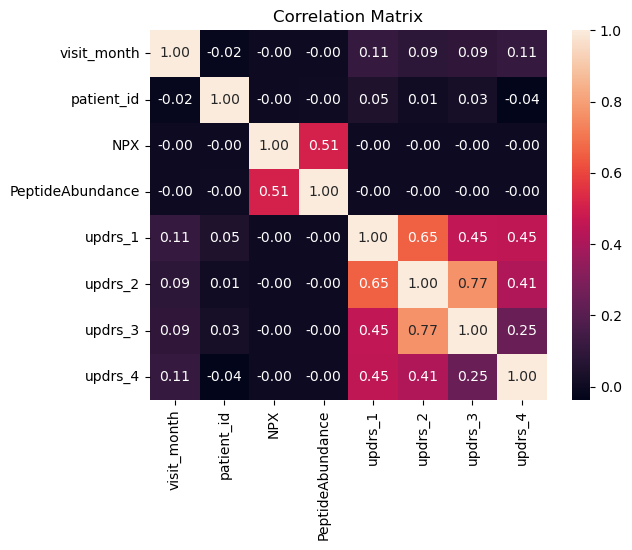

In [ ]:
sns.heatmap(merged.corr(numeric_only=True), annot=True, fmt='.2f')
# Set the title of the plot
plt.title("Correlation Matrix");